In [1]:
import torch
import locale
import sys
import torchvision
import numpy as np
import glob
from torchvision.transforms import functional as F
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.0/608.0 kB 10.4 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO

In [7]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 247MB/s]


In [ ]:
# train: /content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/train
# val: /content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/valid

# nc: 1

# names: ["defect"]

In [8]:
!touch data.yaml

In [ ]:
# Set the confidence threshold to 0.5
conf_threshold = 0.5

In [9]:
model.train(data = "/content/data.yaml",epochs = 30)

Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [10]:
model =YOLO("/content/runs/detect/train/weights/best.pt")

In [14]:

# Load the image
image_path = "/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/images/DSC00124_rotated.JPG"


image = cv2.imread(image_path)

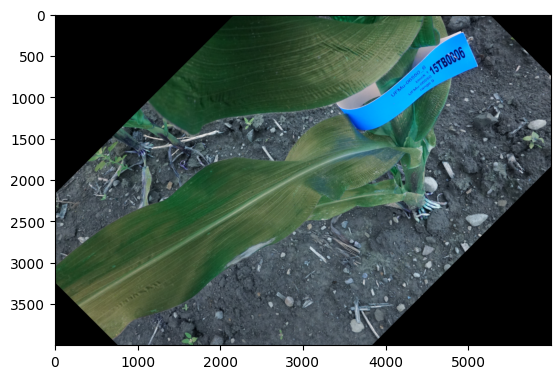

In [15]:
image_name= image_path.split('/')[-1].split('.')[0]
image_name
plt.imshow(image)

In [16]:
objects = model.predict(image,conf=0.25,save = True)

for result in objects:
  boxes = result.boxes
  cls = boxes.cls

bbox=boxes.xyxy.tolist()
bbox



0: 448x640 1 defect, 128.7ms
Speed: 16.6ms preprocess, 128.7ms inference, 15.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


[[2016.2913818359375, 2677.357177734375, 2667.925048828125, 3096.721435546875]]

In [ ]:
bbox

[[2121.10888671875, 2185.433349609375, 2435.838134765625, 2771.205078125],
 [3098.681640625, 3120.105712890625, 3283.742919921875, 3207.328125]]

In [ ]:
pred_img = '/content/runs/detect/predict/image0.jpg'
pred_img = cv2.imread(pred_img)

In [ ]:
# infer.predict("/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/images",save = True)

# SAM

In [2]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

In [3]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

# Set the locale to UTF-8
!export LC_ALL=en_US.UTF-8
!export LANG=en_US.UTF-8


!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-4khhvztd
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-4khhvztd
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=33b4ffdc3b569be6a8373529e4b35cd95e62a4dd40122f5730fbe09a0e999437
  Stored in directory: /tmp/pip-ephem-wheel-cache-ffirf4qw/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2023-07-26 11:08:07--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 54.192.18.50, 54.192.18.81, 54

In [11]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor=(255/255, 102/255, 102/255), facecolor=(0, 0, 0, 0), lw=2))


In [12]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)


In [13]:
predictor.set_image(image)

NameError: ignored

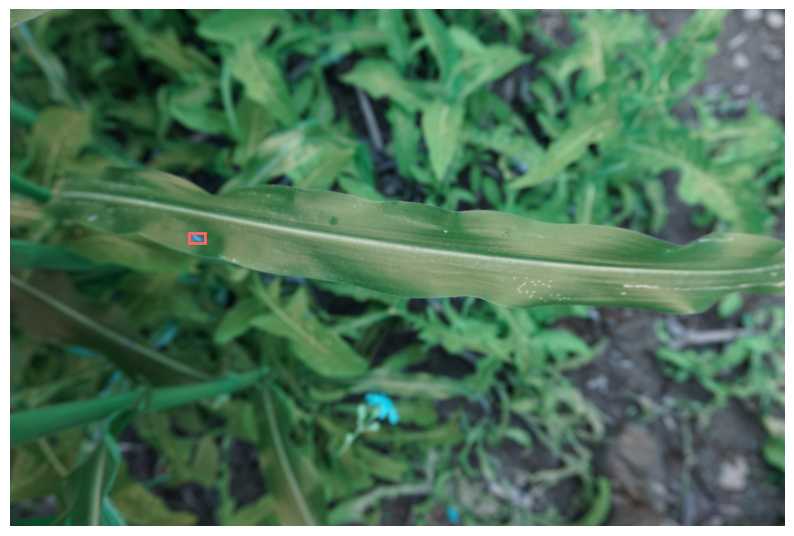

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Iterate over each bounding box
all_masks = []
for input_bbox in bbox:
    input_bbox_np = np.array(input_bbox)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_bbox_np[None, :],
        multimask_output=False,
    )

    # Append the masks to the list
    all_masks.append(masks)

# Visualize all the masks together
for masks, input_bbox in zip(all_masks, bbox):
    # Visualize the bounding box for each object
    show_box(input_bbox, plt.gca())

    # Visualize the mask for each object
    show_mask(masks[0], plt.gca())

output_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/OutPut_Images'
output_path = os.path.join(output_folder,f"{image_name}.png")
# plt.savefig(output_path, bbox_inches='tight')
plt.axis('off')
plt.show()

In [ ]:
# def show_mask_overlaid(image, mask, alpha=0.6, color=(30/255, 144/255, 255/255)):
#     h, w = mask.shape[-2:]
#     mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
#     composite_image = (image * (1 - alpha) + mask_image * alpha).astype(np.uint8)
#     return composite_image


In [ ]:
for input_bbox in bbox:
    input_bbox_np = np.array(input_bbox)
    print(input_bbox_np)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_bbox_np[None, :],
        multimask_output=False,
    )


[     2411.6      3075.6      2576.1      3414.6]
[     3045.9        3554      3141.6      3704.3]
[     1997.4      3456.8      2364.6      3992.3]
[     4234.2      639.99      4529.2      884.04]
[     1657.3      2529.7      1752.4      2674.2]
[     3473.6      1379.7        3559      1593.8]
[     3553.2      480.63      3628.3      646.26]
[     2001.5      3344.9      2083.2      3554.1]
[     880.36      2401.1      1388.8      2767.2]
[     3277.3      1394.7      3369.4      1575.8]
[     2062.5      3525.4      2362.3      3968.7]
[     3862.2      390.92      3949.8      496.14]
[       3990       374.6      4032.7      413.88]


In [ ]:
import cv2

# Iterate over each bounding box and its mask
for input_bbox in bbox:
    input_bbox_np = np.array(input_bbox)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_bbox_np[None, :],
        multimask_output=False,
    )
    print(masks.shape)

    if masks.shape[0] > 0:
        # The predictor is predicting a mask for this bounding box
        mask = masks[0]
        print(f" unique values of the mask {np.unique(masks[0])}")

        # Process the mask as needed
        # ...
    else:
        # The predictor is not predicting a mask for this bounding box
        print("No mask predicted for this bounding box.")


(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]
(1, 4000, 6000)
 unique values of the mask [False  True]


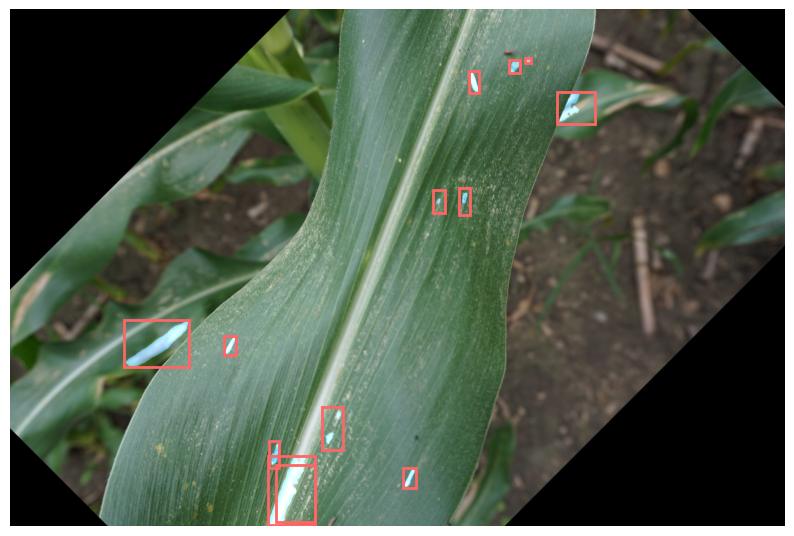

In [ ]:
import cv2

# Create a copy of the original image to store the composite with masks
composite_image = image.copy()

# Iterate over each bounding box and its mask
for input_bbox in bbox:
    input_bbox_np = np.array(input_bbox)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_bbox_np[None, :],
        multimask_output=False,
    )

    # Get the mask for the current object
    mask = masks[0]

    # Convert the mask to a binary mask (0s and 1s) based on a threshold value (0.5)
    binary_mask = mask > 0.5

    # Get the color for the mask (similar to the Segment Anything model)
    color = [30/255, 144/255, 255/255]  # RGB color [30, 144, 255]

    # Apply the color to the binary mask with alpha blending
    alpha = 0.6
    colored_mask = np.zeros_like(image, dtype=np.uint8)
    colored_mask[binary_mask] = (color[2]*224, color[1]*224, color[0]*224)  # Swap color order for BGR format and scale to 0-255

    # Apply alpha blending to overlay the colored mask on the original image
    composite_image = cv2.addWeighted(composite_image, 1, colored_mask, alpha, 0)

# Visualize the composite image with all the masks and bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(composite_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.axis('off')

# Iterate over each bounding box and plot it on the composite image
for input_bbox in bbox:
    # Visualize the bounding box for each object
    show_box(input_bbox, plt.gca())

# Save the composite image with all the masks
output_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/OutPut_Images'
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, f"{image_name}_masks_overlay.png")
# plt.savefig(output_path, bbox_inches='tight')

plt.show()


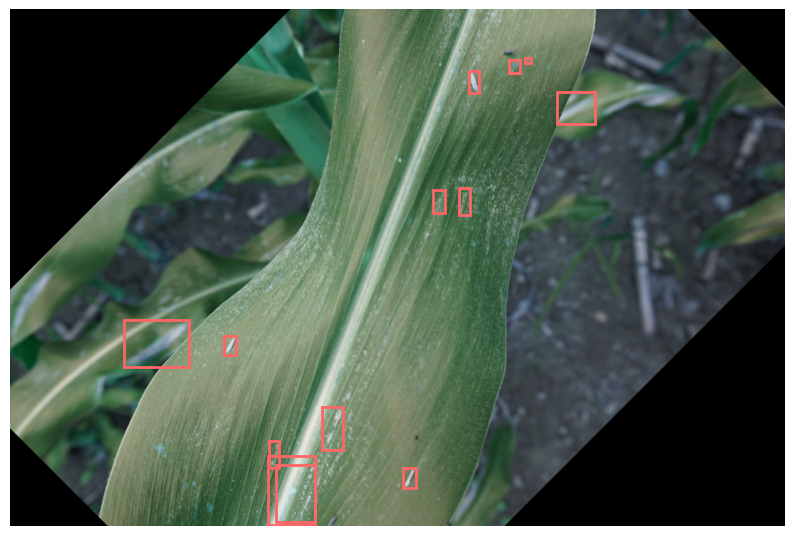

In [ ]:
import cv2

# Create a blank image to store the composite with masks
composite_image = np.zeros_like(image)

# Iterate over each bounding box and its mask
for input_bbox in bbox:
    input_bbox_np = np.array(input_bbox)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_bbox_np[None, :],
        multimask_output=False,
    )

    # Get the mask for the current object
    mask = masks[0]

    # Create a mask with the same shape as the composite image
    mask_image = np.zeros_like(composite_image)

    # Overlay the mask on the mask_image
    mask_image[mask > 0.5] = 1

    # Overlay the mask_image on the composite image
    composite_image[mask_image > 0] = image[mask_image > 0]

# Visualize the composite image with all the masks and bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Iterate over each bounding box and plot it on the composite image
for input_bbox in bbox:
    # Visualize the bounding box for each object
    show_box(input_bbox, plt.gca())

plt.axis('off')

# Save the composite image with all the masks
output_folder = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/models/OutPut_Images'
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, f"{image_name}_masks_overlay.png")
plt.savefig(output_path, bbox_inches='tight')

plt.show()


In [ ]:
# input_bbox = np.array(bbox)
# masks, _, _ = predictor.predict(
#         point_coords=None,
#         point_labels=None,
#         box=input_bbox[None,:],
#         multimask_output=False,
#     )

# plt.figure(figsize=(10,10))
# plt.imshow(image)
# show_mask(masks[0],plt.gca())
# show_box(input_bbox,plt.gca())
# plt.axis('off')
# plt.show()

NameError: ignored

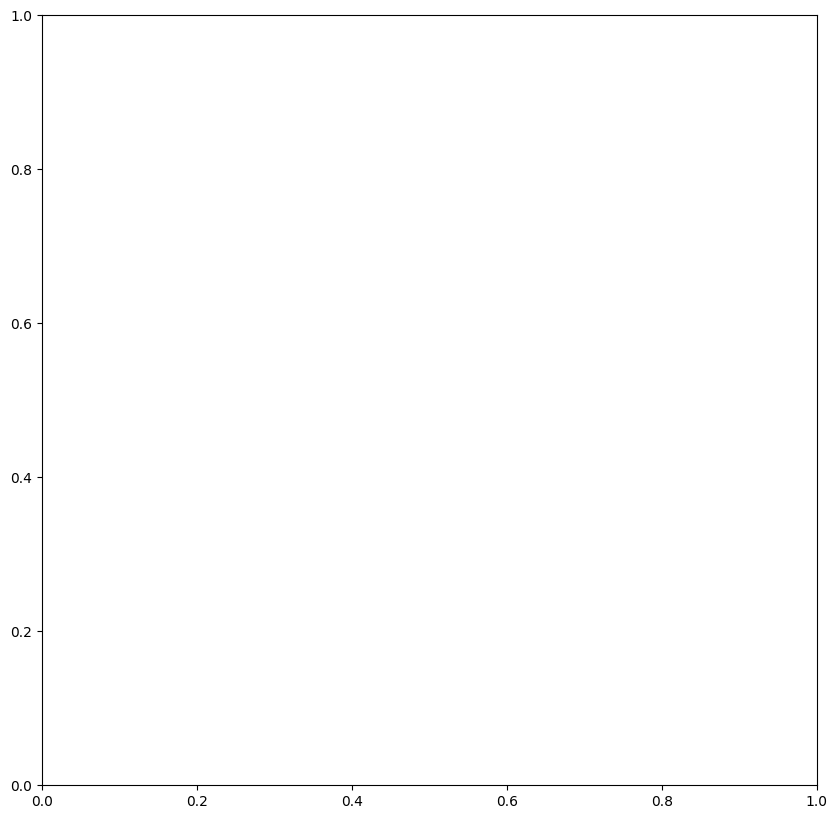

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'all_masks' is the list containing segmentation masks for each bounding box

# Create a figure and axis to plot the image and masks
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the original image
ax.imshow(pred_img)

# Plot the segmentation masks for each bounding box
for mask in all_masks:
    show_mask(mask, ax, random_color=True)  # Set random_color to True for different colors for each mask

# Assuming 'boxes' is the result from the detection model
boxes = objects[0].boxes
cls = boxes.cls

# Show the bounding boxes
for box in boxes.data:
    show_box(box[:4], ax)

# Set the title and show the plot
plt.title("Segmentation Masks and Bounding Boxes")
plt.axis('off')
plt.show()
